In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

houses = pd.read_csv('train.csv', delimiter = ',')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# PROBLEM 1: Feature selection for practice

In [2]:
df = houses[['GrLivArea', 'YearBuilt', 'SalePrice']]
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


# PROBLEM 2: Estimation and evaluation by linear regression

- Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

mse_X_GrLivArea = []
mse_X_YearBuilt = []
model_names = []

model_names.append('Linear Regression')
X_GrLivArea = df.loc[:, ['GrLivArea']]
y = df.loc[:, ['SalePrice']]
X_GrLivArea_train, X_GrLivArea_test, y_train, y_test = train_test_split(X_GrLivArea, y, test_size=0.25, random_state=42)
X_GrLivArea_train_standard = StandardScaler().fit_transform(X_GrLivArea_train)
X_GrLivArea_test_standard = StandardScaler().fit_transform(X_GrLivArea_test)

X_YearBuilt = df.loc[:, ['YearBuilt']]
X_YearBuilt_train, X_YearBuilt_test, y_train, y_test = train_test_split(X_YearBuilt, y, test_size=0.25, random_state=42)
X_YearBuilt_train_standard = StandardScaler().fit_transform(X_YearBuilt_train)
X_YearBuilt_test_standard = StandardScaler().fit_transform(X_YearBuilt_test)


In [4]:
reg = LinearRegression().fit(X_GrLivArea_train_standard, y_train)
reg_pred_X_GrLivArea = reg.predict(X_GrLivArea_test_standard)

mse_X_GrLivArea.append(mean_squared_error(y_true=y_test, y_pred=reg_pred_X_GrLivArea))
print('MSE GrLivArea:', mse_X_GrLivArea[-1])

MSE GrLivArea: 3098575951.3510942


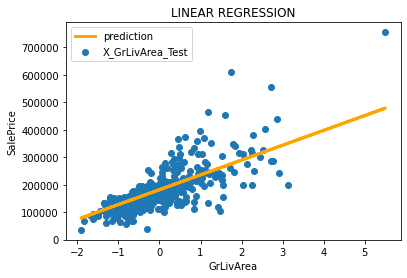

In [5]:
plt.scatter(X_GrLivArea_test_standard, y_test)
plt.plot(X_GrLivArea_test_standard, reg_pred_X_GrLivArea , color='orange', linewidth=3)
plt.title('LINEAR REGRESSION')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["prediction","X_GrLivArea_Test"])
plt.show()

In [6]:
reg = LinearRegression().fit(X_YearBuilt_train_standard, y_train)
reg_pred_X_YearBuilt = reg.predict(X_YearBuilt_test_standard)

mse_X_YearBuilt.append(mean_squared_error(y_true=y_test, y_pred=reg_pred_X_YearBuilt))
print('MSE YearBuilt:', mse_X_YearBuilt[-1])

MSE YearBuilt: 5006973372.116411


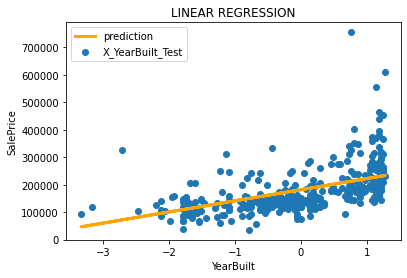

In [7]:
plt.scatter(X_YearBuilt_test_standard, y_test)
plt.plot(X_YearBuilt_test_standard, reg_pred_X_YearBuilt , color='orange', linewidth=3)
plt.title('LINEAR REGRESSION')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["prediction","X_YearBuilt_Test"])
plt.show()

# PROBLEM 3: Comparison of methods

- SVR

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

model_names.append('SVM')
svr = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svr.fit(X_GrLivArea_train_standard, np.ravel(y_train))
svr_pre_X_GrLivArea = svr.predict(X_GrLivArea_test_standard)
mse_X_GrLivArea.append(mean_squared_error(y_true=y_test, y_pred=svr_pre_X_GrLivArea))
print('MSE GrLivArea:', mse_X_GrLivArea[-1])

MSE GrLivArea: 3698056236.652055


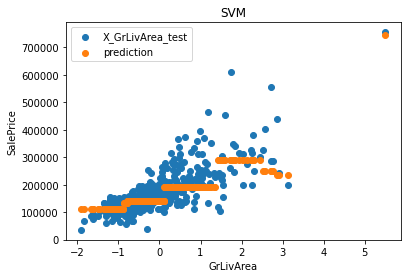

In [9]:
plt.scatter(X_GrLivArea_test_standard, y_test)
plt.scatter(X_GrLivArea_test_standard, svr_pre_X_GrLivArea)
plt.title('SVM')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X_GrLivArea_test","prediction"])
plt.show()

In [10]:
svr.fit(X_YearBuilt_train_standard, np.ravel(y_train))
svr_pre_X_YearBuilt = svr.predict(X_YearBuilt_test_standard)
mse_X_YearBuilt.append(mean_squared_error(y_true=y_test, y_pred=svr_pre_X_YearBuilt))
print('MSE YearBuilt:', mse_X_YearBuilt[-1])

MSE YearBuilt: 5379144154.460274


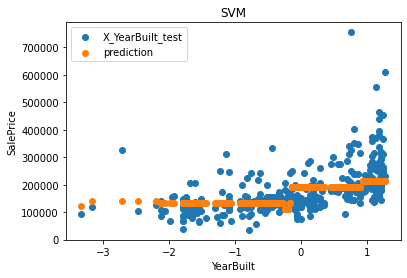

In [11]:
plt.scatter(X_YearBuilt_test_standard, y_test)
plt.scatter(X_YearBuilt_test_standard, svr_pre_X_YearBuilt)
plt.title('SVM')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X_YearBuilt_test","prediction"])
plt.show()

- Decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

model_names.append('Decision Tree')
dtc = DecisionTreeClassifier().fit(X_GrLivArea_train_standard, y_train)
dtc_pred_X_GrLivArea = dtc.predict(X_GrLivArea_test_standard)
mse_X_GrLivArea.append(mean_squared_error(y_true=y_test, y_pred=dtc_pred_X_GrLivArea))
print('MSE GrLivArea:', mse_X_GrLivArea[-1])

MSE GrLivArea: 5616133539.4


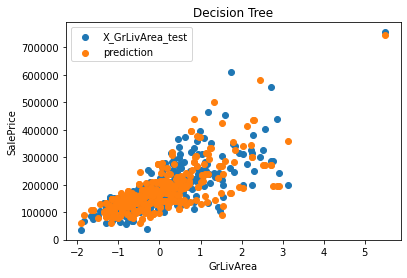

In [13]:
plt.scatter(X_GrLivArea_test_standard, y_test)
plt.scatter(X_GrLivArea_test_standard, dtc_pred_X_GrLivArea)
plt.title('Decision Tree')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(['X_GrLivArea_test', 'prediction'])
plt.show()

In [14]:
dtc = DecisionTreeClassifier().fit(X_YearBuilt_train_standard, y_train)
dtc_pred_X_YearBuilt = dtc.predict(X_YearBuilt_test_standard)
mse_X_YearBuilt.append(mean_squared_error(y_true=y_test, y_pred=dtc_pred_X_YearBuilt))
print('MSE YearBuilt:', mse_X_YearBuilt[-1])

MSE YearBuilt: 6886803782.008219


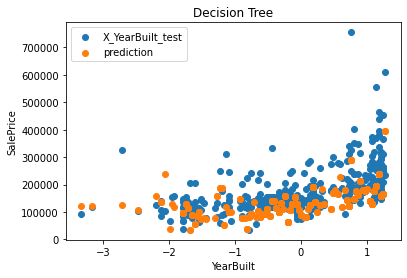

In [15]:
plt.scatter(X_YearBuilt_test_standard, y_test)
plt.scatter(X_YearBuilt_test_standard, dtc_pred_X_YearBuilt)
plt.title('Decision Tree')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(['X_YearBuilt_test', 'prediction'])
plt.show()

- Random Forest




In [16]:
from sklearn.ensemble import RandomForestClassifier

model_names.append('Random Forest')

rfc = RandomForestClassifier().fit(X_GrLivArea_train_standard, np.ravel(y_train))
rfc_pred_X_GrLivArea = rfc.predict(X_GrLivArea_test_standard)

mse_X_GrLivArea.append(mean_squared_error(y_true=y_test, y_pred=rfc_pred_X_GrLivArea))
print('MSE GrLivArea:', mse_X_GrLivArea[-1])

MSE GrLivArea: 5742727797.665753


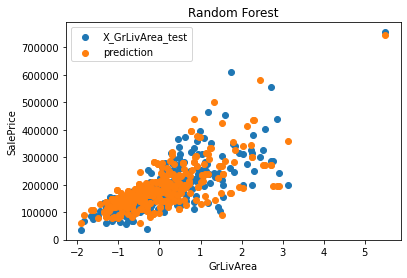

In [17]:
plt.scatter(X_GrLivArea_test_standard, y_test)
plt.scatter(X_GrLivArea_test_standard, rfc_pred_X_GrLivArea)
plt.title('Random Forest')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X_GrLivArea_test","prediction"])
plt.show()

In [18]:
rfc = RandomForestClassifier().fit(X_YearBuilt_train_standard, np.ravel(y_train))
rfc_pred_X_YearBuilt = rfc.predict(X_YearBuilt_test_standard)

mse_X_YearBuilt.append(mean_squared_error(y_true=y_test, y_pred=rfc_pred_X_YearBuilt))
print('MSE YearBuilt:', mse_X_YearBuilt[-1])

MSE YearBuilt: 6729114684.180822


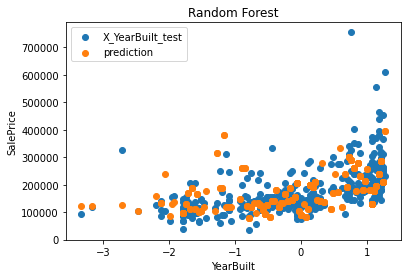

In [19]:
plt.scatter(X_YearBuilt_test_standard, y_test)
plt.scatter(X_YearBuilt_test_standard, rfc_pred_X_YearBuilt)
plt.title('Random Forest')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X_YearBuilt_test","prediction"])
plt.show()

In [20]:
pd.DataFrame(mse_X_GrLivArea, index=model_names, columns=['MSE GrLivArea'])

,MSE GrLivArea
Linear Regression,3.098576e+09
SVM,3.698056e+09
Decision Tree,5.616134e+09
Random Forest,5.742728e+09


With GrLivArea feature, we can see that "Linear Regression" has the best prediction because it has least "Mean Square Error" value

In [21]:
pd.DataFrame(mse_X_YearBuilt, index=model_names, columns=['MSE YearBuilt'])

,MSE YearBuilt
Linear Regression,5.006973e+09
SVM,5.379144e+09
Decision Tree,6.886804e+09
Random Forest,6.729115e+09


The same result can be seen when we apply these methods for YearBuit attribute, the "Linear Regression" continue to has smallest "Mean Square Error" value.